In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from yellowbrick.classifier import confusion_matrix, classification_report, roc_auc, class_prediction_error, discrimination_threshold
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importa base

In [2]:
data = load_breast_cancer(as_frame=True)['frame']

In [3]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
data.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

# EDA

In [5]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [6]:
data.target.value_counts()

1    357
0    212
Name: target, dtype: int64

# Separa base de treino e base de teste
* Por que separar?
* Por que embaralhar a base antes de separar?

In [7]:
#Primeiro embaralhamos a base (por quê?)
data = data.sample(frac=1)

In [8]:
X = data.iloc[:,:-1]
y = data['target']

In [9]:
Xtrn, Xtst, ytrn, ytst = train_test_split(X, y, test_size=0.33, random_state=123)

# Processamento dos dados e _feature engineering_

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()
Xtrn = scaler.fit_transform(Xtrn)
Xtst = scaler.transform(Xtst)

Desafio: Por que dar fit na base treino apenas, e não na base inteira? 

# Cria modelos - 1 (sem cross-validation)

In [12]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [13]:
modelos = {'dummy': DummyClassifier(),
           'logistic': LogisticRegression(),
           'KNN': KNeighborsClassifier(),
           'tree': DecisionTreeClassifier(),
           'rf': RandomForestClassifier(),
           'nn': MLPClassifier(max_iter=500)}
,
resultados = pd.DataFrame([], index = modelos.keys(), columns=['precision','recall','f1','accuracy'])
resultados

,precision,recall,f1,accuracy
dummy,NaN,NaN,NaN,NaN
logistic,NaN,NaN,NaN,NaN
KNN,NaN,NaN,NaN,NaN
tree,NaN,NaN,NaN,NaN
rf,NaN,NaN,NaN,NaN
nn,NaN,NaN,NaN,NaN


In [14]:
for nome, modelo in modelos.items():
    modelo.fit(Xtrn,ytrn)
    ypred = modelo.predict(Xtst)
    
    precision = precision_score(ytst, ypred)
    recall = recall_score(ytst, ypred)
    f1 = f1_score(ytst, ypred)
    accuracy = accuracy_score(ytst, ypred)
    
    resultados.loc[nome,:] = precision, recall, f1, accuracy
    modelos[nome] = modelo

resultados    

,precision,recall,f1,accuracy
dummy,0.638889,0.605263,0.621622,0.553191
logistic,0.982609,0.991228,0.9869,0.984043
KNN,0.965812,0.991228,0.978355,0.973404
tree,0.938053,0.929825,0.933921,0.920213
rf,0.957265,0.982456,0.969697,0.962766
nn,0.973913,0.982456,0.978166,0.973404


Vamos supor que nossa métrica mais importante é _accuracy_:

In [15]:
resultados.sort_values('accuracy',ascending=False)

,precision,recall,f1,accuracy
logistic,0.982609,0.991228,0.9869,0.984043
KNN,0.965812,0.991228,0.978355,0.973404
nn,0.973913,0.982456,0.978166,0.973404
rf,0.957265,0.982456,0.969697,0.962766
tree,0.938053,0.929825,0.933921,0.920213
dummy,0.638889,0.605263,0.621622,0.553191


# Cria modelos - 2 (com cross-validation)

In [16]:
from sklearn.model_selection import cross_validate

In [17]:
#Qual o output do cross-validation?
cross_validate(modelo, Xtrn, ytrn, scoring = ['precision','recall','f1','accuracy'])

{'fit_time': array([1.45146966, 2.21513081, 1.86770821, 1.64100575, 1.87482882]),
 'score_time': array([0.00504899, 0.00099969, 0.00458145, 0.00926352, 0.00504637]),
 'test_precision': array([0.96      , 0.97959184, 1.        , 0.95918367, 0.98      ]),
 'test_recall': array([0.97959184, 1.        , 1.        , 0.95918367, 1.        ]),
 'test_f1': array([0.96969697, 0.98969072, 1.        , 0.95918367, 0.98989899]),
 'test_accuracy': array([0.96103896, 0.98684211, 1.        , 0.94736842, 0.98684211])}

In [18]:
#Quais as métricas de avaliação possíveis?
from sklearn.metrics import SCORERS
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [19]:
#Comparação de modelos usando cross-validation
modelos = {'dummy': DummyClassifier(),
           'logistic': LogisticRegression(),
           'KNN': KNeighborsClassifier(),
           'tree': DecisionTreeClassifier(),
           'rf': RandomForestClassifier(),
           'nn': MLPClassifier(max_iter=500)}
,
resultados = pd.DataFrame([], index = modelos.keys(), columns=['precision','recall','f1','accuracy'])

In [20]:
for nome, modelo in modelos.items():
    modelo.fit(Xtrn,ytrn)
    ypred = modelo.predict(Xtst)
    
    cv = cross_validate(modelo, Xtrn, ytrn, scoring = ['precision','recall','f1','accuracy'])
    
    precision = cv['test_precision'].mean()
    recall = cv['test_recall'].mean()
    f1 = cv['test_f1'].mean()
    accuracy = cv['test_accuracy'].mean()
    
    resultados.loc[nome,:] = precision, recall, f1, accuracy
    modelos[nome] = modelo

resultados.sort_values('accuracy',ascending=False)

,precision,recall,f1,accuracy
nn,0.975755,0.987755,0.981694,0.976418
logistic,0.967422,0.979592,0.973364,0.965926
KNN,0.949001,0.991752,0.969814,0.960595
rf,0.96747,0.971173,0.969061,0.960595
tree,0.933561,0.921854,0.927416,0.908031
dummy,0.679113,0.703656,0.691014,0.598394


# Comparação dos modelos via AUC e ROC

In [21]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_curve, roc_auc_score

In [22]:
resultados = pd.DataFrame([], index = modelos.keys(), columns=['precision','recall','f1','accuracy','auc'])
resultados

,precision,recall,f1,accuracy,auc
dummy,NaN,NaN,NaN,NaN,NaN
logistic,NaN,NaN,NaN,NaN,NaN
KNN,NaN,NaN,NaN,NaN,NaN
tree,NaN,NaN,NaN,NaN,NaN
rf,NaN,NaN,NaN,NaN,NaN
nn,NaN,NaN,NaN,NaN,NaN


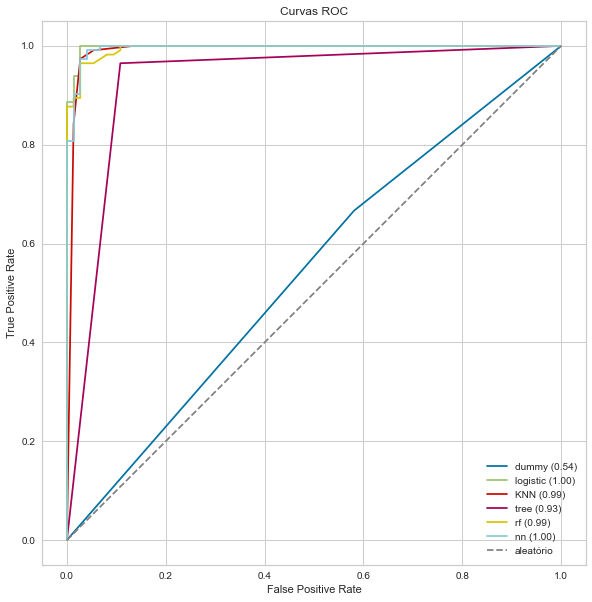

In [23]:
plt.figure(figsize=(10,10))

for nome, modelo in modelos.items():
    modelo.fit(Xtrn,ytrn)
    ypred = modelo.predict(Xtst)
    ppred = modelo.predict_proba(Xtst)[:,1]
    

    
    precision = precision_score(ytst, ypred)
    recall = recall_score(ytst, ypred)
    f1 = f1_score(ytst, ypred)
    accuracy = accuracy_score(ytst, ypred)
    auc = roc_auc_score(ytst, ppred)
    
    resultados.loc[nome,:] = precision, recall, f1, accuracy, auc
    
    fpr, tpr, _ = roc_curve(ytst, ppred)
    plt.plot(fpr, tpr, label=f'{nome} ({auc:.2f})')
    
    modelos[nome] = modelo

plt.title('Curvas ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0,1],[0,1], c='gray', linestyle='dashed', label='aleatório')
plt.legend()
plt.axis('square')
plt.show()

In [24]:
resultados.sort_values('auc', ascending=False)

,precision,recall,f1,accuracy,auc
logistic,0.982609,0.991228,0.9869,0.984043,0.997629
nn,0.973913,0.982456,0.978166,0.973404,0.995495
rf,0.941176,0.982456,0.961373,0.952128,0.994844
KNN,0.965812,0.991228,0.978355,0.973404,0.990102
tree,0.932203,0.964912,0.948276,0.93617,0.928402
dummy,0.623077,0.710526,0.663934,0.56383,0.542793


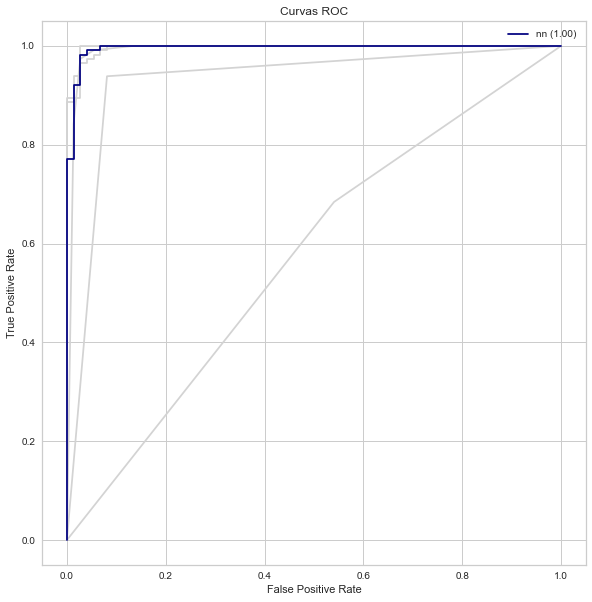

In [25]:
plt.figure(figsize=(10,10))

for nome, modelo in modelos.items():
        
    modelo.fit(Xtrn,ytrn)
    ypred = modelo.predict(Xtst)
    ppred = modelo.predict_proba(Xtst)[:,1]
    

    
    precision = precision_score(ytst, ypred)
    recall = recall_score(ytst, ypred)
    f1 = f1_score(ytst, ypred)
    accuracy = accuracy_score(ytst, ypred)
    auc = roc_auc_score(ytst, ppred)
    
    resultados.loc[nome,:] = precision, recall, f1, accuracy, auc
    
    fpr, tpr, _ = roc_curve(ytst, ppred)
    
    if nome == 'nn':
        plt.plot(fpr, tpr, label=f'{nome} ({auc:.2f})', c='navy')
    else:
        plt.plot(fpr, tpr, c='lightgray')
    
    modelos[nome] = modelo


plt.title('Curvas ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.axis('square')
plt.show()


# Investigando um modelo mais a fundo...

In [45]:
modelo = modelos['KNN']

In [46]:
previsao = modelo.predict(Xtrn)
previsao

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,

In [47]:
modelo.predict_proba(Xtrn)[:10,:]

array([[1. , 0. ],
       [0.2, 0.8],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ]])

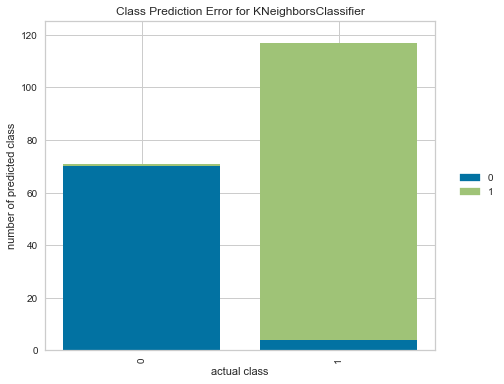

In [54]:
class_prediction_error(modelo, Xtrn, ytrn, Xtst, ytst, is_fitted=True);

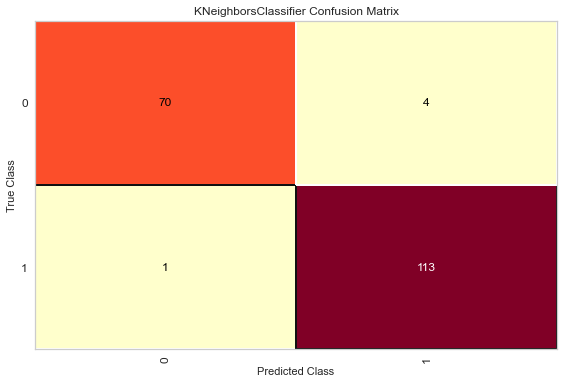

In [49]:
confusion_matrix(modelo, Xtrn, ytrn, Xtst, ytst, is_fitted=True);

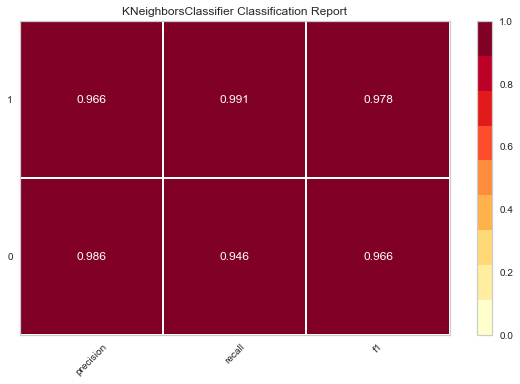

In [50]:
classification_report(modelo, Xtrn, ytrn, Xtst, ytst, is_fitted=True);

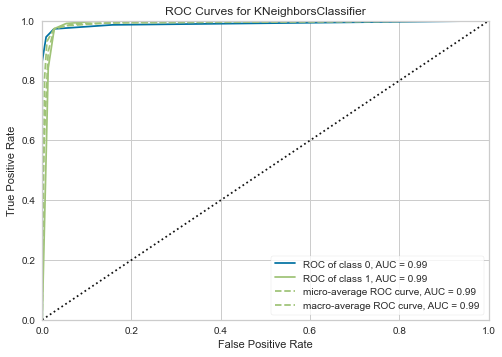

In [55]:
roc_auc(modelo, Xtrn, ytrn, Xtst, ytst, is_fitted=True);

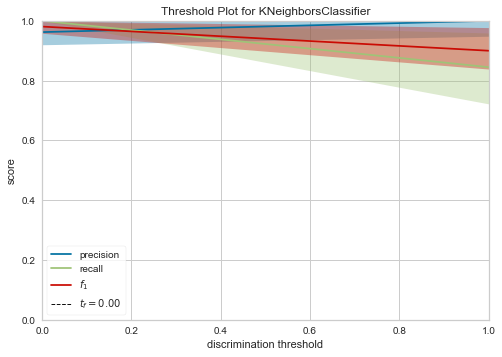

In [59]:
discrimination_threshold(modelo, Xtrn, ytrn, exclude=['queue_rate'], is_fitted=True);

# Hyperparameter tuning

* O que são hiperparâmetros
* Por que otimizar hiperparâmetros?
* Técnicas:
    * Grid search
    * Random search
    * Otimização Bayesiana

Aqui vamos fazer a mais simples: Grid Search.

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
grid = {'n_neighbors': [1, 5, 10, 50], 
        'weights': ['uniform','distance'], 
        'p':[1,2]}

gscv = GridSearchCV(KNeighborsClassifier(), grid, scoring='accuracy', cv=5).fit(Xtrn, ytrn)

gscv.cv_results_

{'mean_fit_time': array([0.00184278, 0.00103159, 0.00288191, 0.00196209, 0.00134602,
        0.00051346, 0.00193453, 0.00253105, 0.00232897, 0.00415773,
        0.00132265, 0.00395169, 0.00422864, 0.00164175, 0.00299816,
        0.00347419]),
 'std_fit_time': array([0.00178227, 0.00063247, 0.00187275, 0.00248097, 0.0009143 ,
        0.00042851, 0.00094862, 0.00279471, 0.00216071, 0.00294836,
        0.00217931, 0.0033865 , 0.00282359, 0.00234622, 0.00246362,
        0.00293707]),
 'mean_score_time': array([0.00500793, 0.0023037 , 0.00502715, 0.00617509, 0.00819297,
        0.00994139, 0.00695777, 0.00597653, 0.00406089, 0.00288358,
        0.00996447, 0.00416069, 0.00848937, 0.00569625, 0.01099696,
        0.00706191]),
 'std_score_time': array([0.00288628, 0.00057141, 0.00146264, 0.00271258, 0.00264983,
        0.01475225, 0.00327227, 0.00173555, 0.00328222, 0.00244929,
        0.00281743, 0.00315347, 0.00300771, 0.00294053, 0.00327911,
        0.00155751]),
 'param_n_neighbors': mask

In [62]:
#Mais fácil visualizar como um dataframe
pd.DataFrame(gscv.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,0.001346,0.000914,0.008193,0.002650,5,1,uniform,"{'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}",0.974026,0.973684,0.934211,0.960526,0.973684,0.963226,0.015392,1
5,0.000513,0.000429,0.009941,0.014752,5,1,distance,"{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}",0.974026,0.973684,0.934211,0.960526,0.973684,0.963226,0.015392,1
6,0.001935,0.000949,0.006958,0.003272,5,2,uniform,"{'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}",0.974026,0.947368,0.960526,0.947368,0.973684,0.960595,0.011846,3
7,0.002531,0.002795,0.005977,0.001736,5,2,distance,"{'n_neighbors': 5, 'p': 2, 'weights': 'distance'}",0.974026,0.947368,0.960526,0.947368,0.973684,0.960595,0.011846,3
8,0.002329,0.002161,0.004061,0.003282,10,1,uniform,"{'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}",0.974026,0.973684,0.947368,0.934211,0.973684,0.960595,0.016698,3
9,0.004158,0.002948,0.002884,0.002449,10,1,distance,"{'n_neighbors': 10, 'p': 1, 'weights': 'distance'}",0.974026,0.973684,0.947368,0.934211,0.973684,0.960595,0.016698,3
10,0.001323,0.002179,0.009964,0.002817,10,2,uniform,"{'n_neighbors': 10, 'p': 2, 'weights': 'uniform'}",0.935065,0.960526,0.960526,0.947368,0.973684,0.955434,0.013152,7
11,0.003952,0.003386,0.004161,0.003153,10,2,distance,"{'n_neighbors': 10, 'p': 2, 'weights': 'distance'}",0.961039,0.960526,0.947368,0.934211,0.973684,0.955366,0.013460,8
0,0.001843,0.001782,0.005008,0.002886,1,1,uniform,"{'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}",0.948052,0.947368,0.960526,0.947368,0.960526,0.952768,0.006339,9
1,0.001032,0.000632,0.002304,0.000571,1,1,distance,"{'n_neighbors': 1, 'p': 1, 'weights': 'distance'}",0.948052,0.947368,0.960526,0.947368,0.960526,0.952768,0.006339,9


In [63]:
gscv.best_params_

{'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}

In [64]:
gscv.best_score_

0.9632262474367737

In [65]:
melhor_modelo = gscv.best_estimator_
melhor_modelo

KNeighborsClassifier(p=1)

# Feature Importance

In [66]:
from sklearn.inspection import permutation_importance

In [67]:
feature_importance = permutation_importance(melhor_modelo, Xtrn,ytrn, scoring='accuracy')
feature_importance

{'importances_mean': array([-5.24934383e-04,  4.44089210e-17,  0.00000000e+00, -5.24934383e-04,
        -1.57480315e-03, -2.62467192e-03,  0.00000000e+00, -5.24934383e-04,
         5.24934383e-04, -1.57480315e-03, -1.04986877e-03, -3.67454068e-03,
        -1.57480315e-03, -5.24934383e-04,  0.00000000e+00, -5.24934383e-04,
        -5.24934383e-04, -1.04986877e-03, -1.04986877e-03, -1.57480315e-03,
        -1.04986877e-03,  1.04986877e-03, -1.04986877e-03, -1.04986877e-03,
         5.24934383e-04,  0.00000000e+00, -1.04986877e-03, -1.57480315e-03,
        -2.62467192e-03, -1.04986877e-03]),
 'importances_std': array([0.00104987, 0.00234758, 0.        , 0.00104987, 0.00128582,
        0.00234758, 0.        , 0.00104987, 0.00257164, 0.00128582,
        0.00128582, 0.00128582, 0.00128582, 0.00104987, 0.        ,
        0.00104987, 0.00104987, 0.00128582, 0.00128582, 0.00128582,
        0.00128582, 0.00392825, 0.00128582, 0.00128582, 0.00257164,
        0.        , 0.00128582, 0.00209974, 0

In [68]:
(pd.DataFrame(feature_importance['importances_mean'], index=X.columns, columns=['importance']).
 sort_values('importance', ascending=False).
 head()
)

,importance
worst texture,1.049869e-03
worst smoothness,5.249344e-04
mean symmetry,5.249344e-04
mean texture,4.440892e-17
mean perimeter,0.000000e+00


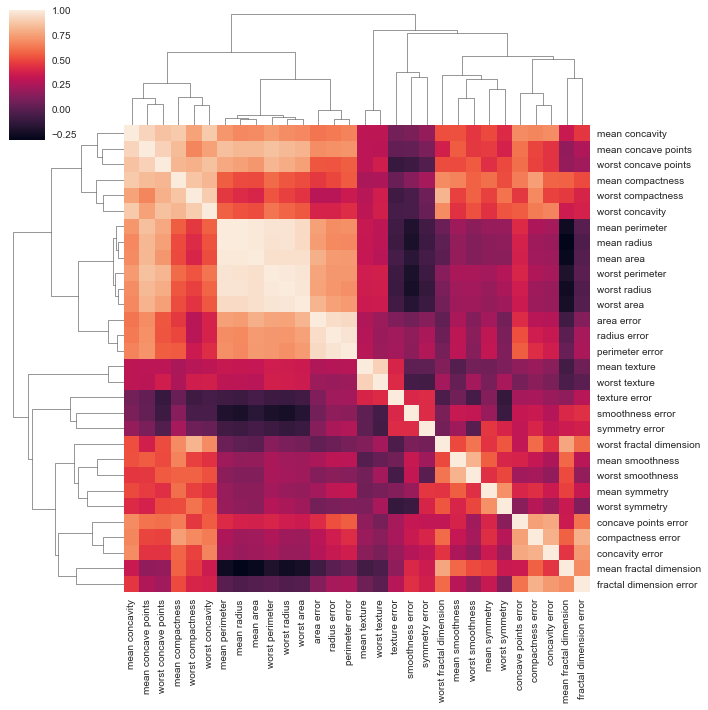

In [69]:
#Note que permutation importance não é uma boa métrica nesse caso:
sns.clustermap(X.corr())
pass

Para SHAP values, veja pacote `shap` 